In [1]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

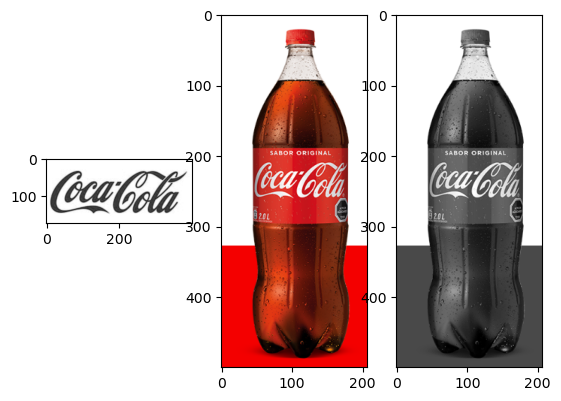

In [2]:
# Cargamos la imagen a procesar
img = cv.imread('images/coca_logo_1.png')

img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
template = cv.imread('template/pattern.png',0)

plt.figure()
plt.subplot(1,3,1)
plt.imshow(template, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img_rgb)
plt.subplot(1,3,3)
plt.imshow(img_gray, cmap='gray')

cv.waitKey()
cv.destroyAllWindows()

In [3]:

print('\nTamaño imagen: {} pix'.format(template.shape))

#Nivel 1
template_nivel_1 = cv.pyrDown(template)
print('\nTamaño imagen: {} pix'.format(template_nivel_1.shape))

#Nivel 2
template_nivel_2 = cv.pyrDown(template_nivel_1)
print('\nTamaño imagen: {} pix'.format(template_nivel_2.shape))

#Nivel 3
template_nivel_3 = cv.pyrDown(template_nivel_2)
print('\nTamaño imagen: {} pix'.format(template_nivel_3.shape))

# Muestro los resultados
# cv.imshow("Template Original", template)
# cv.imshow("Template Nivel 1", template_nivel_1)
# cv.imshow("Template Nivel 2", template_nivel_2)
# cv.imshow("Template Nivel 3", template_nivel_3)

# cv.waitKey()
# cv.destroyAllWindows()


Tamaño imagen: (175, 400) pix

Tamaño imagen: (88, 200) pix

Tamaño imagen: (44, 100) pix

Tamaño imagen: (22, 50) pix


In [4]:
def escalar(img, escalas=[0.5,1,2]):

    '''
    Devuelve una lista de imagenes reescaladas
    param img: imagen a reescalar
    param escalas: lista de escalas
    '''

    scales = escalas
    resized_imgs = list()
    # generamos nuestra "piramide" de tamaños arbitrarios
    for scale in scales:
        img_resized = img.copy()
        resized_imgs.append(cv.resize(img_resized, None, fx=scale, fy=scale))
    
    return resized_imgs


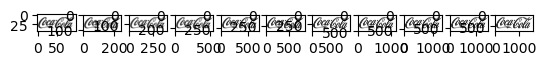

In [5]:
escaladas=escalar(template, np.linspace(0.25,4,11))
for i, imagen_escalada in enumerate(escaladas): 
    plt.subplot(1, len(escaladas), i + 1) 
    plt.imshow(imagen_escalada, cmap='gray') 
    # cv.imshow("str(i)", layer) 

In [6]:
print(img.shape)
print(template.shape)

(500, 207, 3)
(175, 400)


[0.1        0.18881579 0.27763158 0.36644737 0.45526316 0.54407895
 0.63289474 0.72171053 0.81052632 0.89934211 0.98815789 1.07697368
 1.16578947 1.25460526 1.34342105 1.43223684 1.52105263 1.60986842
 1.69868421 1.7875    ]


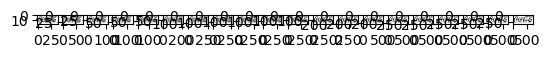

In [7]:
%matplotlib inline

img = cv.imread('images/coca_retro_2.png')
img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
template = cv.imread('template/pattern.png',0)
max_scale_admitida = np.min([(img.shape[0]/template.shape[0]), (img.shape[1]/template.shape[1])])
escalas = np.linspace(0.25,max_scale_admitida,int(max_scale_admitida/0.25))
escalas = np.linspace(0.1,max_scale_admitida,20)
escaladas = templates_scaladed = escalar(template, escalas)
for i, template_scaladed in enumerate(escaladas): 
    plt.subplot(2, len(escaladas), i + 1)
    plt.imshow(template_scaladed, cmap='gray')
    
    # cv.imshow(str(i), template_scaladed)

 
    # cv.imshow("str(i)", layer)

# cv.imshow('img_gray', img_gray)
print(escalas)

cv.waitKey()
cv.destroyAllWindows()



In [8]:

# img_blured = cv.GaussianBlur(img_gray, ksize=(5,5), sigmaX=2, sigmaY=2)
# img_canny  = cv.Canny(img_gray, threshold1=5, threshold2=200)
# img_canny_blured  = cv.Canny(img_blured, threshold1=5, threshold2=200)
# cv.imshow('img_gray', img_gray)
# cv.imshow('img_blured', img_blured)
# cv.imshow('img_canny', img_canny)
# cv.imshow('img_canny_blured', img_canny_blured)

# cv.waitKey()
# cv.destroyAllWindows()

In [61]:
def encontrar_logo_coca(img, patron='template/pattern.png', meth='cv.TM_CCOEFF_NORMED', sigma_blur=2):
    
    img_rgb    = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_gray   = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_blured = cv.GaussianBlur(img_gray, ksize=(15,5), sigmaX=sigma_blur, sigmaY=sigma_blur)
    template   = cv.imread(patron,0)
    template   = cv.Canny(template, threshold1=5, threshold2=200)
    img_gray   = cv.Canny(img_gray, threshold1=5, threshold2=200)
    img_blured = cv.Canny(img_blured, threshold1=5, threshold2=200)
    
    # Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
    img_salida = img_rgb.copy()
    
    # meth = 'cv.TM_CCOEFF'
    method = eval(meth)
    
    # Generamos diferentes escalas del patrón
    # calculo el tamaño máximo del patron escalado para no pasarme de alguna dimensión de la imagen
    max_scale_admitida = np.min([(img.shape[0]/template.shape[0]), (img.shape[1]/template.shape[1])])
    escalas = np.linspace(0.1,max_scale_admitida,20)
    escalas = np.linspace(0.4,max_scale_admitida,20)
    # escalas = [0.5,0.75,1]
    templates_scaladed = escalar(template, escalas)

    min_val_final = 1000000
    max_val_final = -1000000

    for template_scaladed in templates_scaladed:
        
        # Aplicamos la coincidencia de patrones
        #--------------------------------------
        res = cv.matchTemplate(img_blured, template_scaladed, method)
        
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

        # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            if min_val < min_val_final:
                min_val_final = min_val
                top_left = min_loc
                template_final = template_scaladed
                w, h = template_final.shape[::-1]
        else:        
            if max_val > max_val_final:
                max_val_final = max_val
                top_left = max_loc
                template_final = template_scaladed
                w, h = template_final.shape[::-1]
        
        # cv.imshow(str(template_scaladed.shape),template_scaladed)

        
    # Marcamos el lugar donde lo haya encontrado
    #----------------------------------------
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img_salida,top_left, bottom_right, (0, 255, 0), 2)
    
    print('Valor Obtenido por el método {} = {}'.format(meth, max_val_final))
    print('Tamaño Imagen: {}'.format(img_gray.shape))
    print('Tamaño Template Orig: {}'.format(template.shape))
    print('Tamaño Template Scaled: {}'.format(template_final.shape))

    # Graficamos el procesamiento y la salida
    #----------------------------------------
    plt.figure(figsize=(16,16))
    
    # Resultado de coincidencia
    plt.subplot(141),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    
    # Imagen original con recuadros
    plt.subplot(142),plt.imshow(img_salida)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(143),plt.imshow(template_final, cmap='gray')
    plt.subplot(144),plt.imshow(img_blured, cmap='gray')
    

    plt.suptitle(meth)
    plt.show()

    cv.waitKey()
    cv.destroyAllWindows()


Valor Obtenido por el método cv.TM_CCOEFF_NORMED = 0.21738466620445251
Tamaño Imagen: (500, 207)
Tamaño Template Orig: (175, 400)
Tamaño Template Scaled: (76, 175)


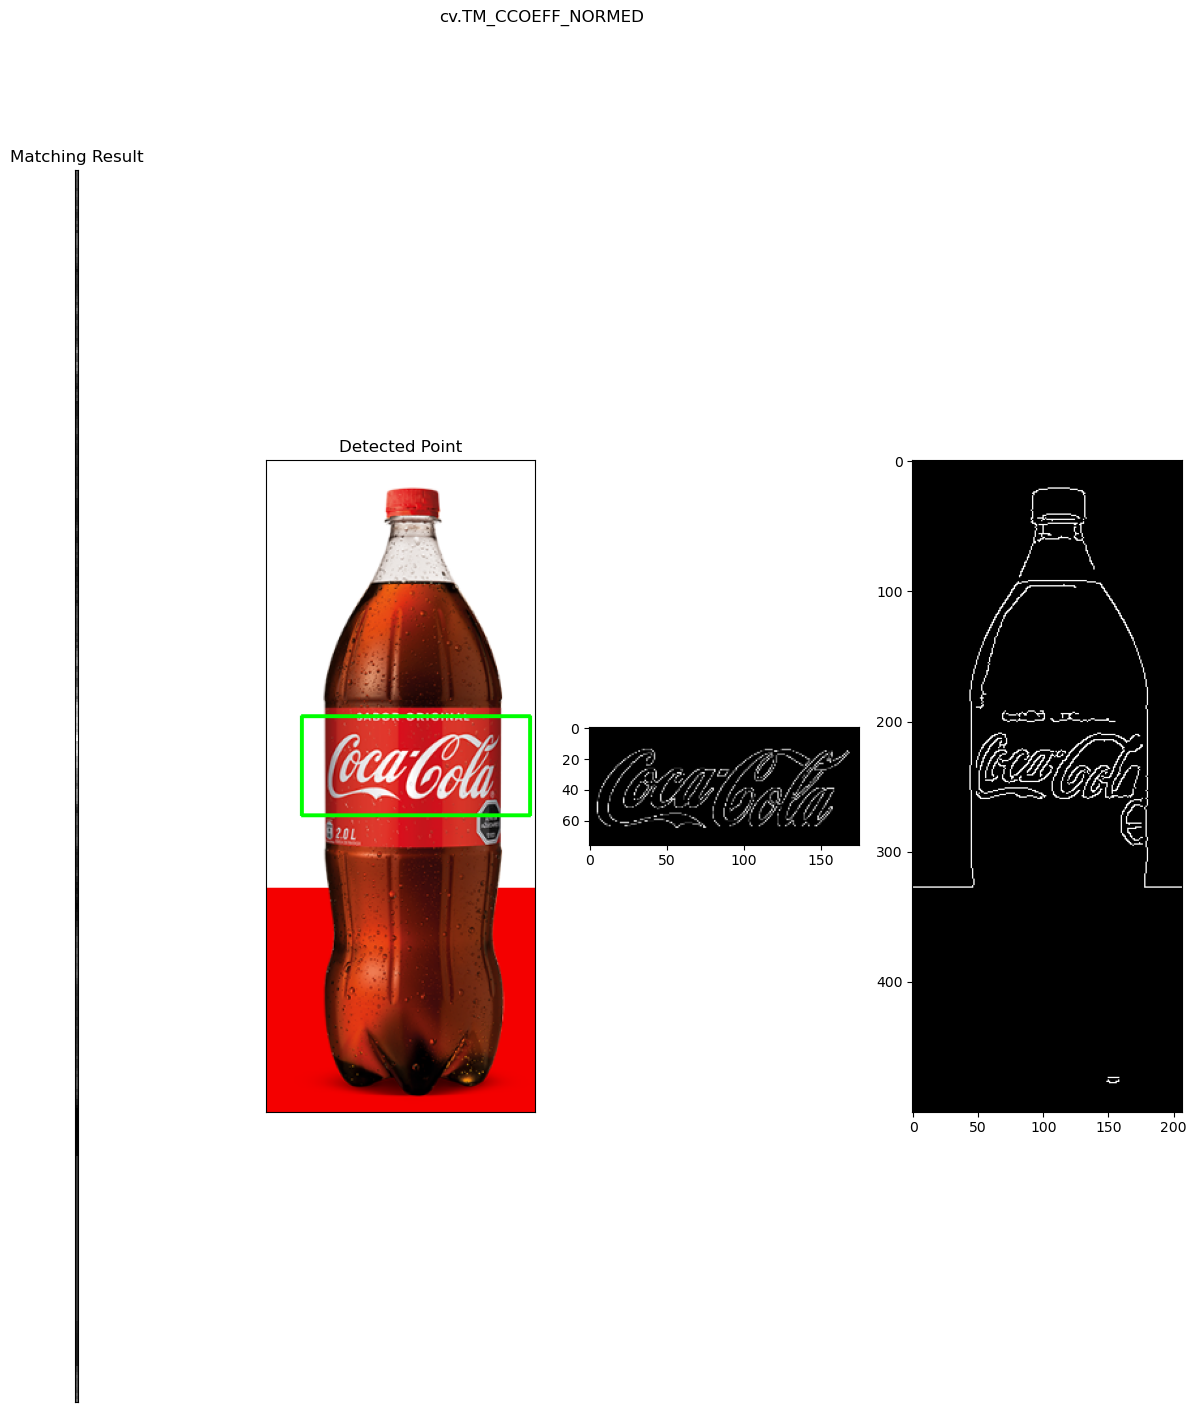

In [62]:
img = cv.imread('images/coca_logo_1.png')
encontrar_logo_coca(img)

Valor Obtenido por el método cv.TM_CCOEFF_NORMED = 0.23140625655651093
Tamaño Imagen: (429, 715)
Tamaño Template Orig: (175, 400)
Tamaño Template Scaled: (70, 160)


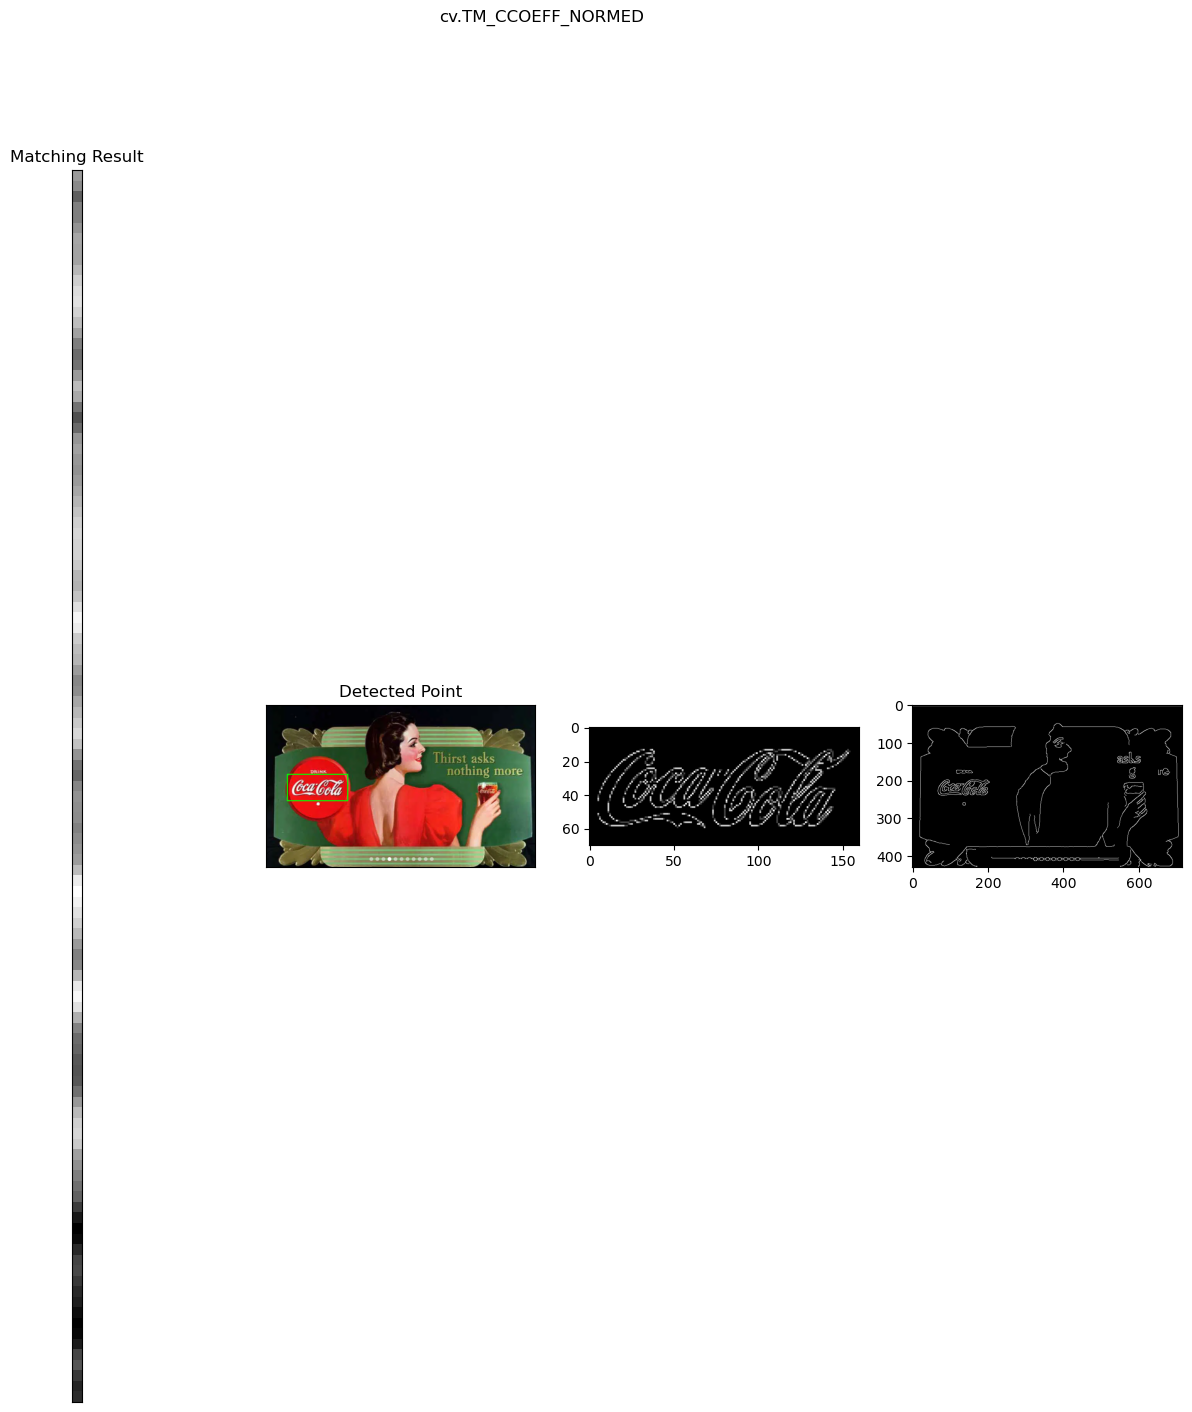

In [10]:
img = cv.imread('images/coca_retro_2.png')
encontrar_logo_coca(img)
# encontrar_logo_coca(img, patron='template/TemplateJP.png')

Valor Obtenido por el método cv.TM_CCOEFF_NORMED = 0.10290705412626266
Tamaño Imagen: (493, 715)
Tamaño Template Orig: (175, 400)
Tamaño Template Scaled: (236, 540)


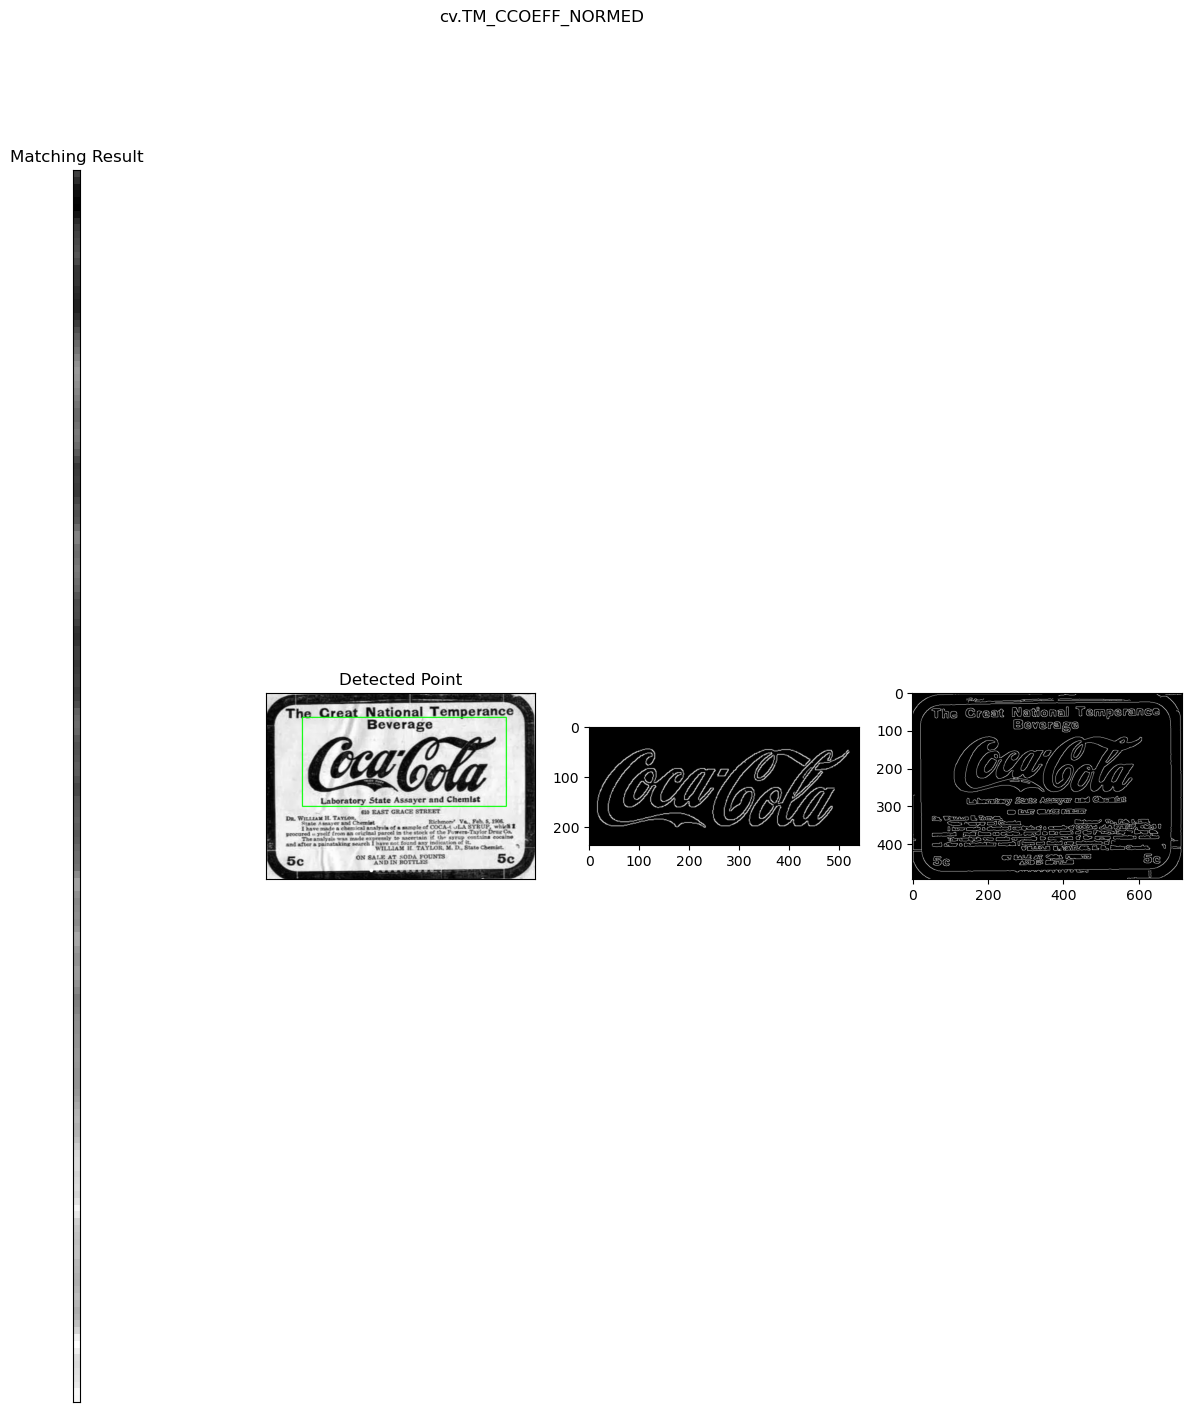

In [11]:
img = cv.imread('images/coca_retro_1.png')
encontrar_logo_coca(img)

Valor Obtenido por el método cv.TM_CCOEFF_NORMED = 0.10594696551561356
Tamaño Imagen: (363, 233)
Tamaño Template Orig: (175, 400)
Tamaño Template Scaled: (92, 210)


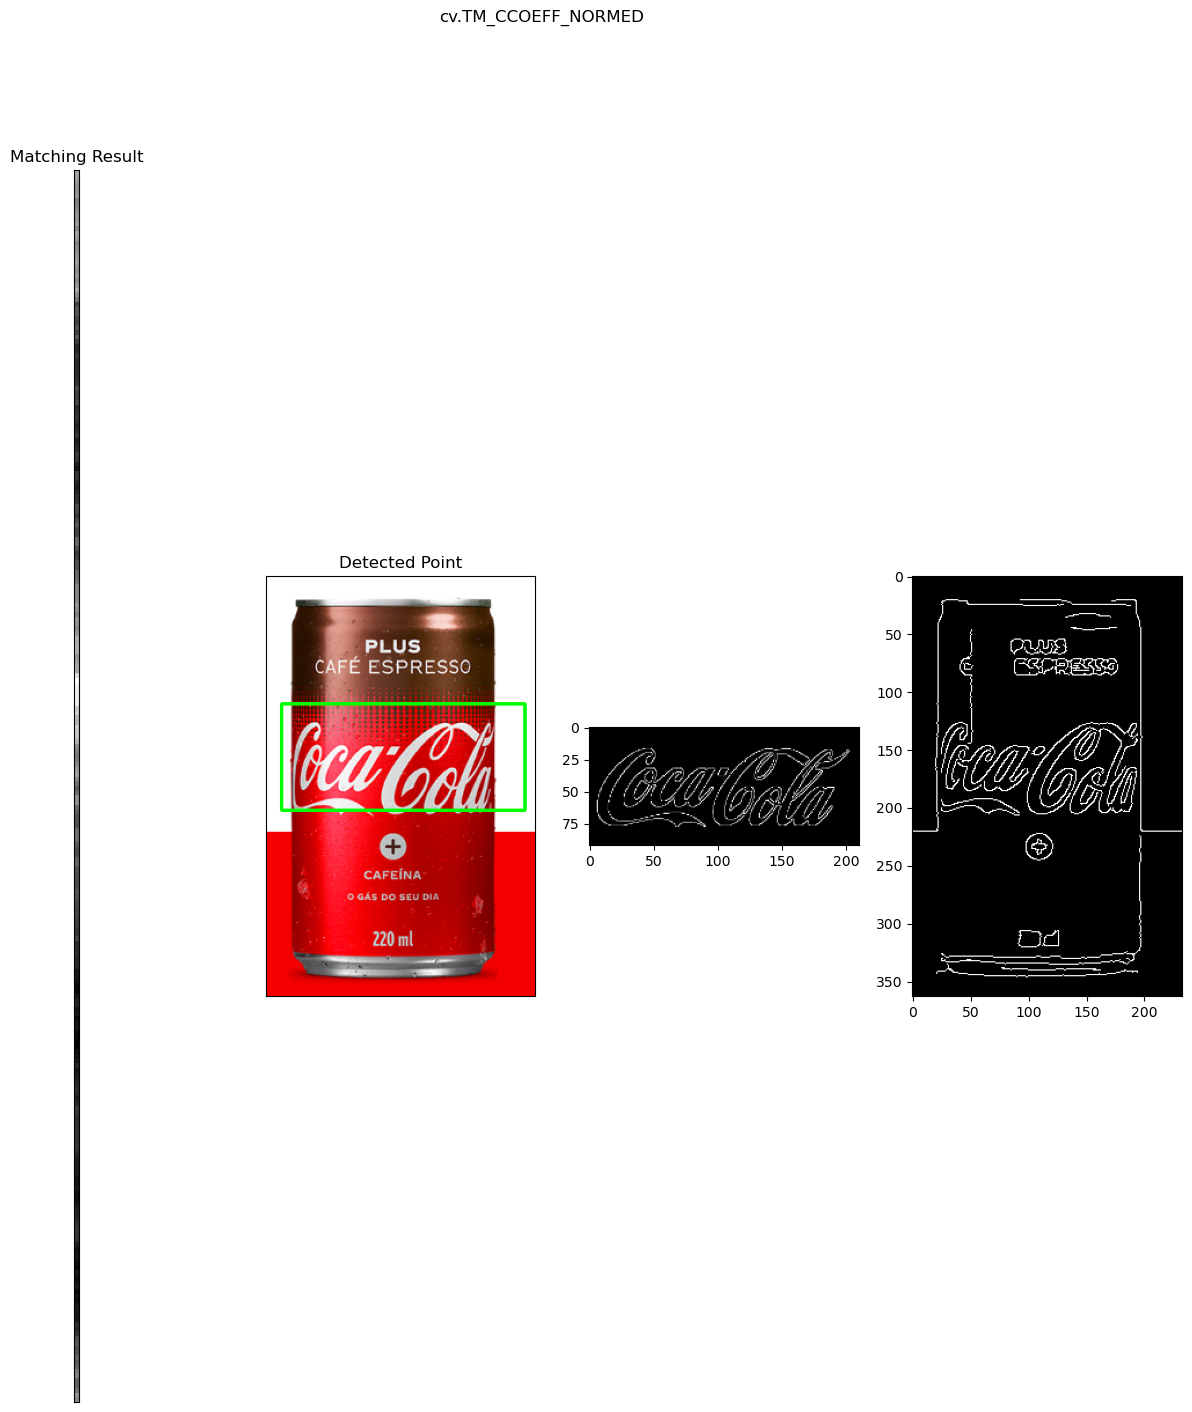

In [12]:
img = cv.imread('images/coca_logo_2.png')
encontrar_logo_coca(img)

In [31]:
np.log2(450*687)

18.23794748003514

In [35]:
int(np.power(img.shape[0]*img.shape[1],1/18))

2

Valor Obtenido por el método cv.TM_CCOEFF_NORMED = 0.14877070486545563
Tamaño Imagen: (450, 687)
Tamaño Template Orig: (175, 400)
Tamaño Template Scaled: (131, 299)


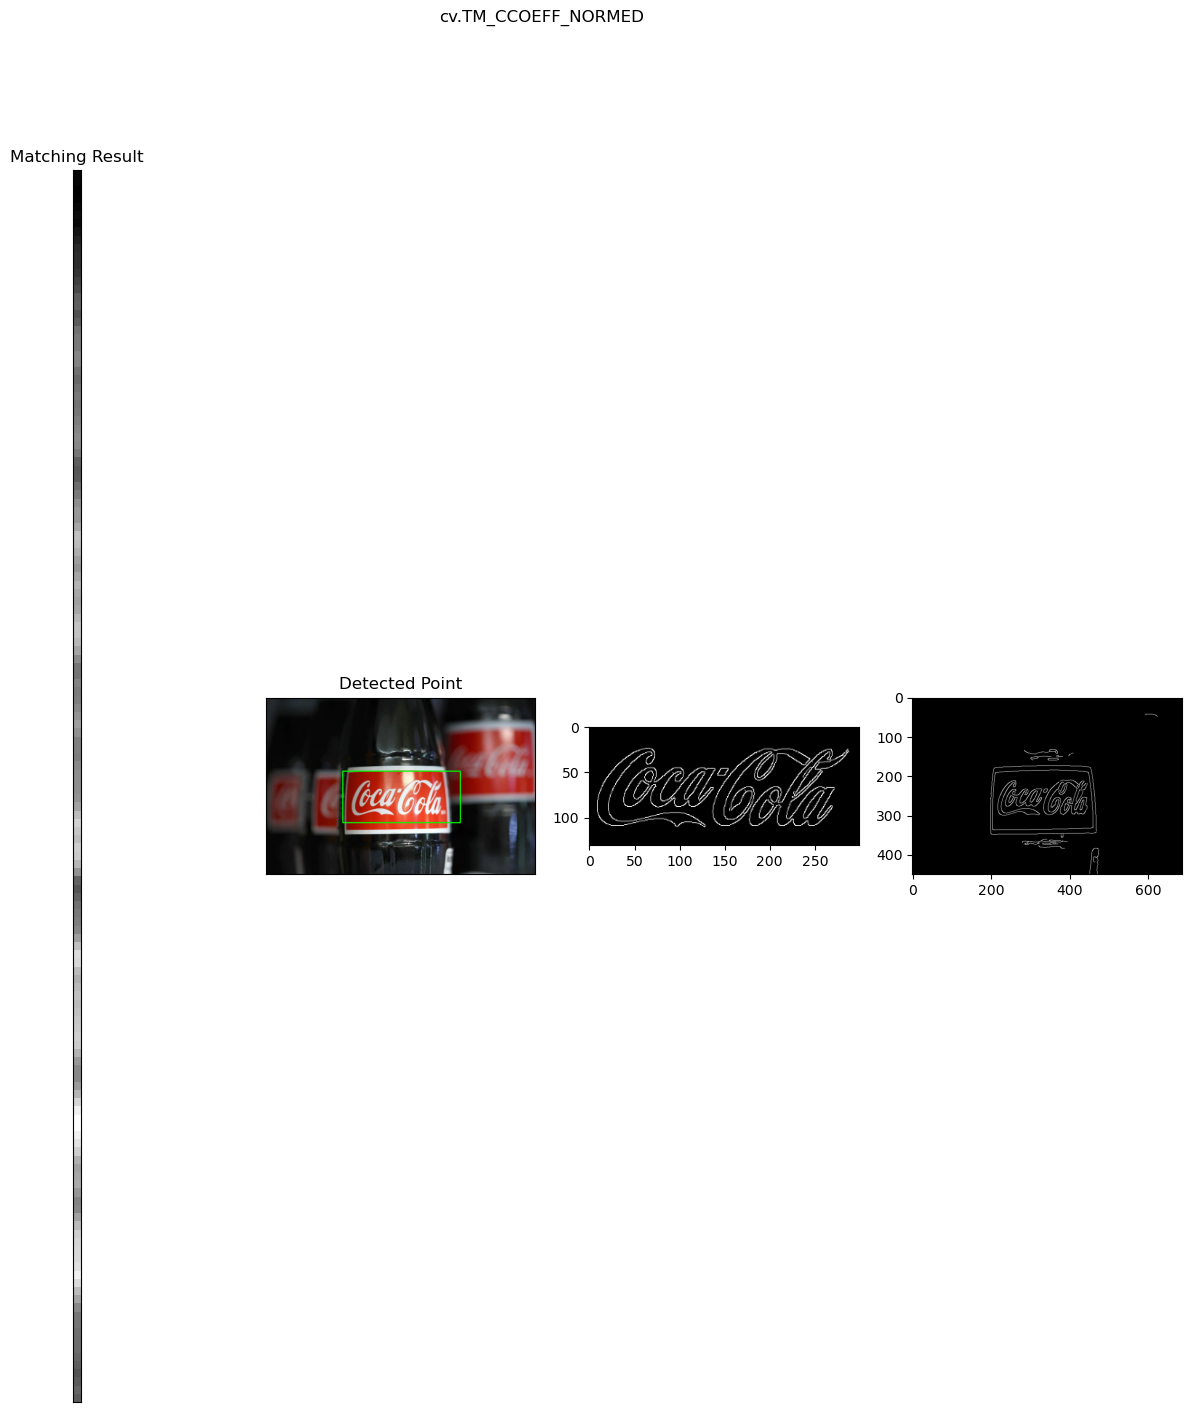

In [49]:
img = cv.imread('images/logo_1.png')

encontrar_logo_coca(img, sigma_blur=2)


Valor Obtenido por el método cv.TM_CCOEFF_NORMED = 0.12757989764213562
Tamaño Imagen: (640, 640)
Tamaño Template Orig: (175, 400)
Tamaño Template Scaled: (258, 589)


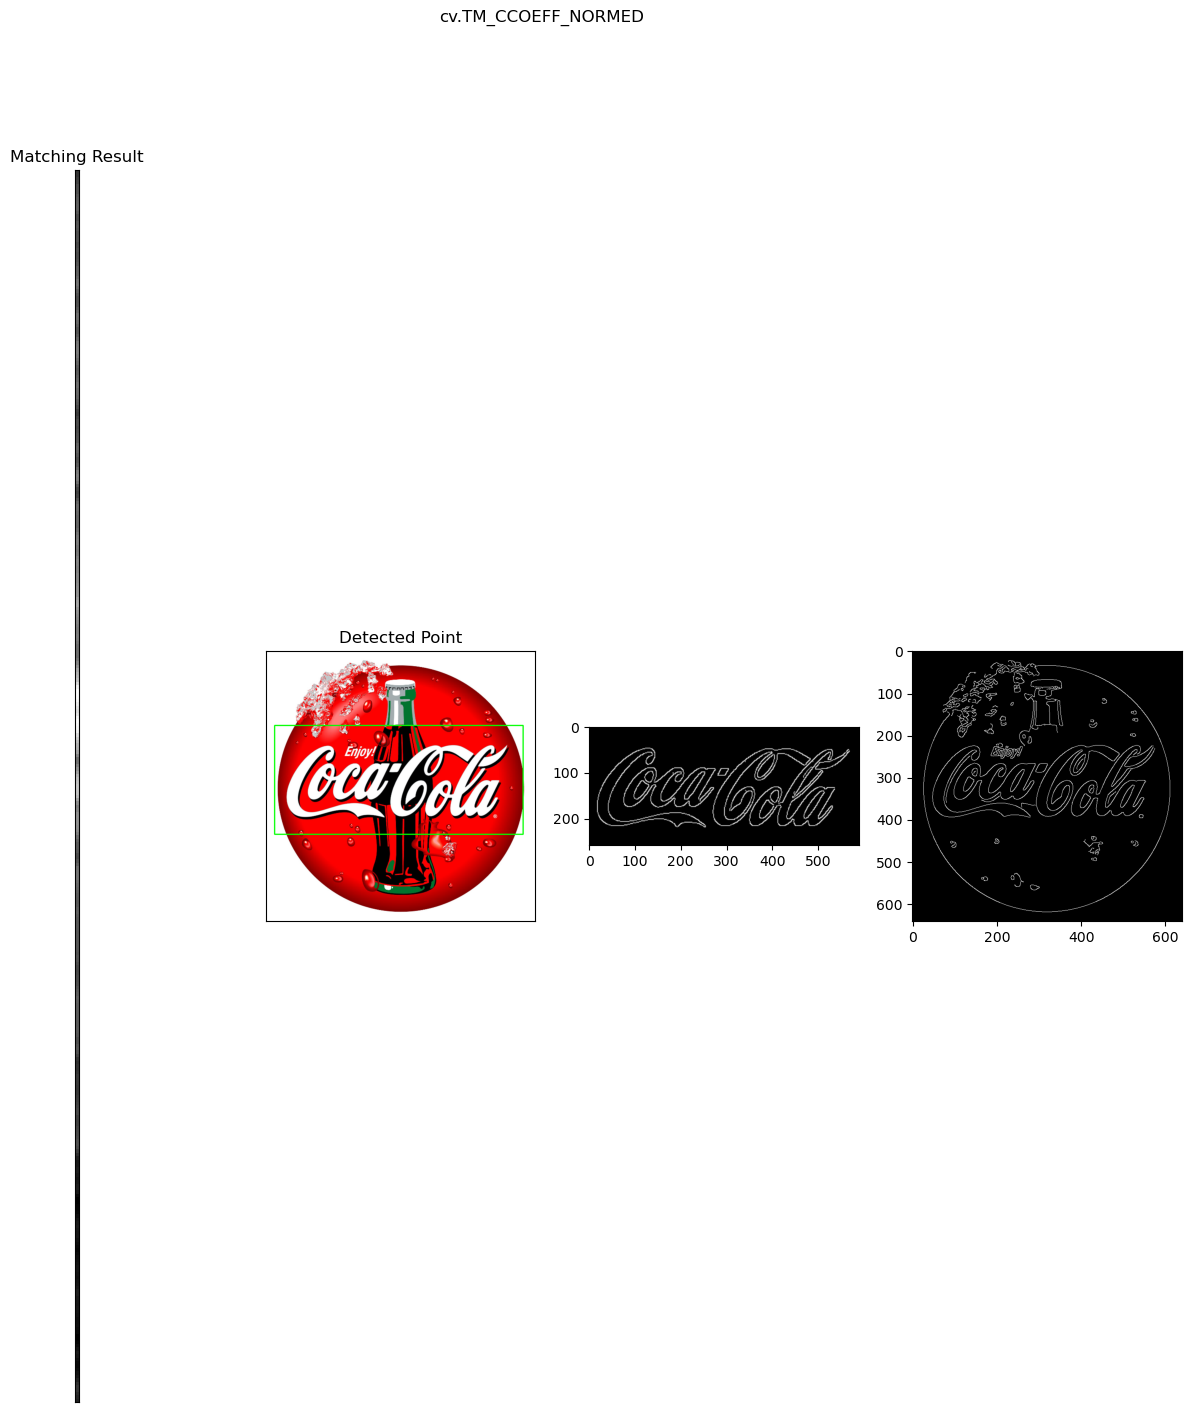

In [58]:
img = cv.imread('images/COCA-COLA-LOGO.jpg')
img_resized = cv.resize(img, (640,640))

encontrar_logo_coca(img_resized, sigma_blur=2)


In [55]:
%matplotlib inline

img2 = cv.imread('images/COCA-COLA-LOGO.jpg',0)
img_Canny = cv.Canny(img2, threshold1=5, threshold2=200)

img_resized = cv.resize(img_Canny, None, fx=0.5, fy=0.5)

mean = cv.blur(img_Canny, (5,5))
median = cv.medianBlur(img_Canny, 5)
gaussian = cv.GaussianBlur(img_Canny, ksize=(15,15), sigmaX=20, sigmaY=20)
resta_org_mediana = img_Canny - median

# cv.namedWindow('Original', cv.WINDOW_FULLSCREEN)

# Mostrar la imagen
cv.imshow('Original', img_Canny)
cv.imshow('img_resized', img_resized)

# cv.imshow('Media', mean)
# cv.imshow('Mediana', median)
# cv.imshow('gaussian', gaussian)
# cv.imshow('resta_org_mediana', resta_org_mediana)
cv.waitKey(0)
cv.destroyAllWindows()